In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('theRestLowRatingData.csv')
chessdata['Opening_new'].describe()


count                 53156
unique                   90
top       Queen's Pawn Game
freq                   4943
Name: Opening_new, dtype: object

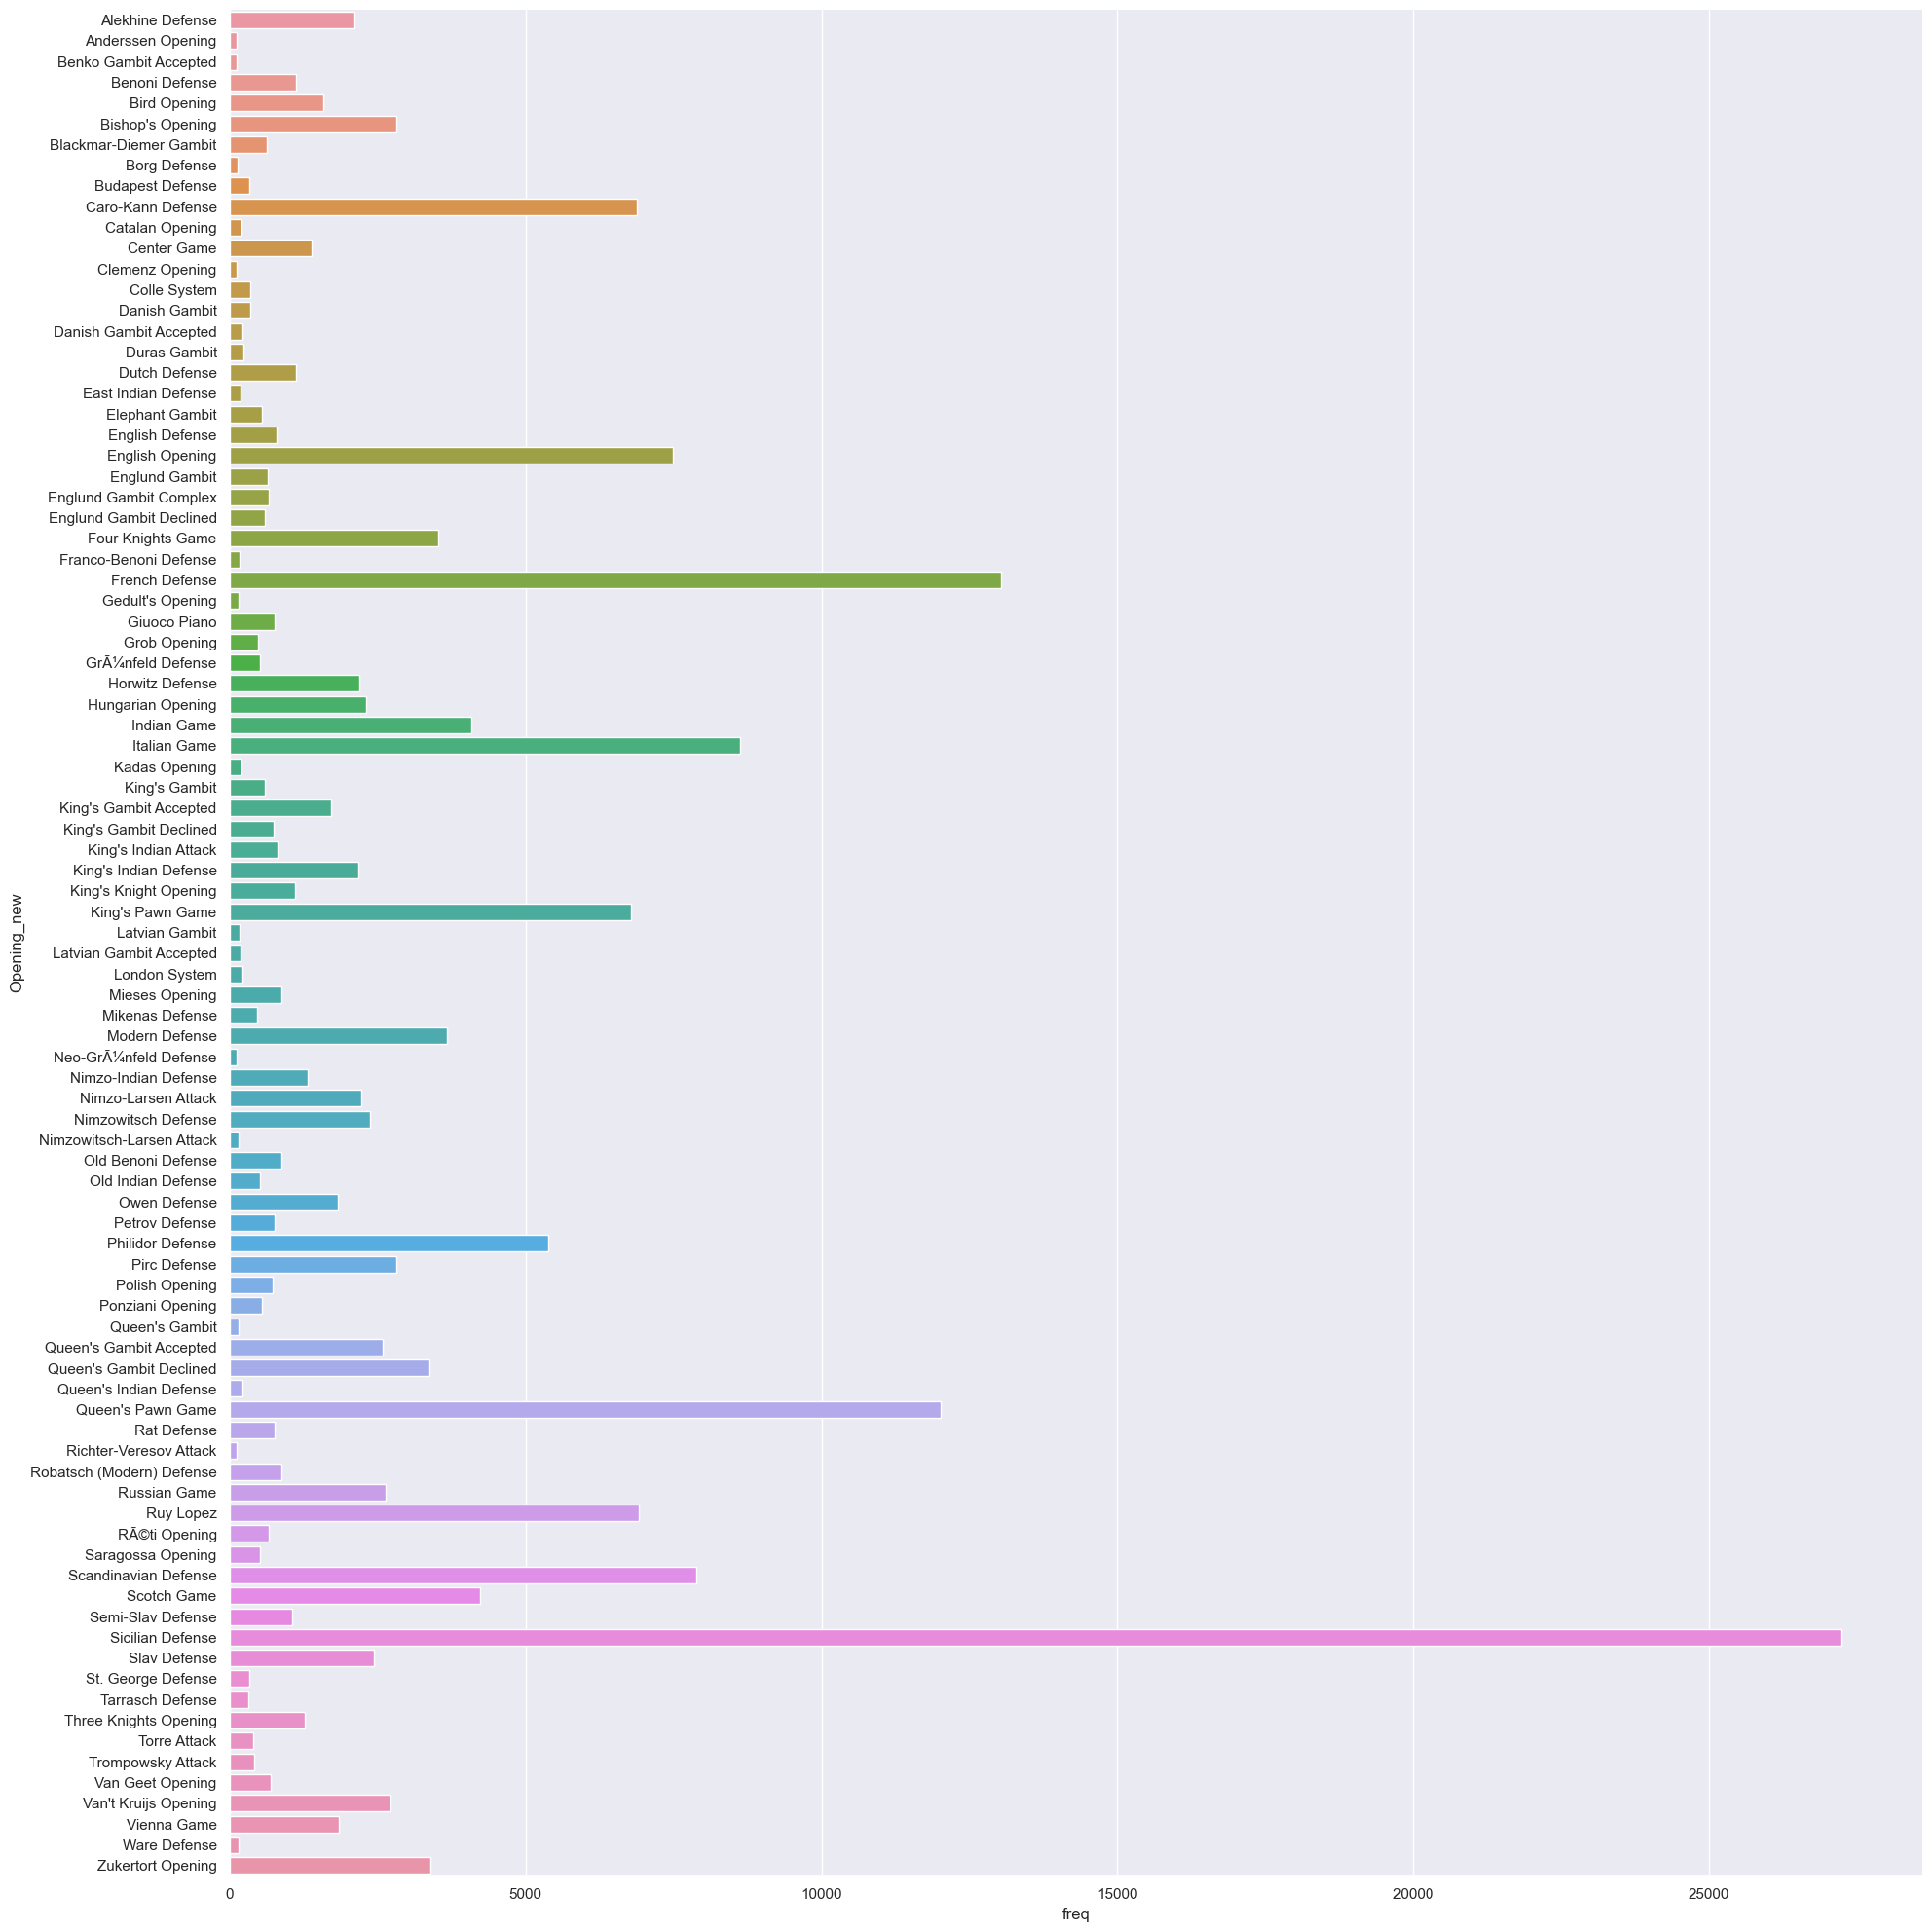

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]
temp = temp[temp.Result != '*']

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


,Opening_new,tot,win,win_rate
44881,Benko Gambit Accepted,1,0,0.0
659,Colle System,74,22,0.297297
6881,Neo-GrÃ¼nfeld Defense,6,2,0.333333
992,Budapest Defense,22,8,0.363636
2768,East Indian Defense,30,11,0.366667
...,...,...,...,...
84,Queen's Gambit Accepted,837,516,0.616487
212,Duras Gambit,80,50,0.625
16865,Catalan Opening,6,4,0.666667
568,Queen's Gambit,52,37,0.711538


Win rate for white

In [6]:
temp = temp[temp['tot'] >500]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
81,Van't Kruijs Opening,1099,423,0.384895
12,Indian Game,682,281,0.412023
2,Sicilian Defense,4843,2206,0.455503
0,Caro-Kann Defense,1101,505,0.458674
15,Center Game,655,301,0.459542
5,Hungarian Opening,704,338,0.480114
116,Modern Defense,925,449,0.485405
17,French Defense,3124,1517,0.485595
9,King's Pawn Game,3919,1904,0.485838
18,Four Knights Game,1398,681,0.487124


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]
temp1 = temp1[temp1.Result != '*']

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
1659,Nimzowitsch-Larsen Attack,22,5,0.227273
568,Queen's Gambit,52,14,0.269231
16865,Catalan Opening,6,2,0.333333
84,Queen's Gambit Accepted,837,309,0.369176
212,Duras Gambit,80,30,0.375
...,...,...,...,...
2768,East Indian Defense,30,19,0.633333
992,Budapest Defense,22,14,0.636364
6881,Neo-GrÃ¼nfeld Defense,6,4,0.666667
659,Colle System,74,51,0.689189


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >500]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
84,Queen's Gambit Accepted,837,309,0.369176
3,Philidor Defense,1821,713,0.391543
100,Russian Game,1060,454,0.428302
44,Ruy Lopez,1812,780,0.430464
11,Queen's Gambit Declined,1392,614,0.441092
1,Scotch Game,1193,529,0.44342
67,Three Knights Opening,624,278,0.445513
49,Scandinavian Defense,2438,1095,0.449139
162,Horwitz Defense,642,297,0.462617
41,Vienna Game,690,321,0.465217


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
chessdata = chessdata[chessdata.Result != '*']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]


In [16]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))


In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [32]:
# chessdata.info()
chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])
chessData_num = chessdata[['ELO Diff','Ave ELO']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)
predictors_cat_ohe[['ELO Diff', 'Ave ELO']] = chessData_num
predictors_cat_ohe['res'] = chessData_res
predictors_cat_ohe = predictors_cat_ohe.dropna()


In [37]:


# Extract Response and Predictors
y = pd.DataFrame(predictors_cat_ohe['res'])
X = pd.DataFrame(predictors_cat_ohe.drop('res', axis = 1))
X = X.drop('Ave ELO', axis = 1)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=100) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [38]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5536563734580343

Test Data
Accuracy  :	 0.5380949394870509



[Text(0.5625, 0.9285714285714286, 'ELO Diff <= 9.5\ngini = 0.516\nsamples = 37209\nvalue = [17874, 632, 18703]\nclass = White'),
 Text(0.2996031746031746, 0.7857142857142857, 'ELO Diff <= -111.5\ngini = 0.514\nsamples = 21428\nvalue = [11356, 373, 9699]\nclass = Black'),
 Text(0.12698412698412698, 0.6428571428571429, 'ELO Diff <= -211.5\ngini = 0.472\nsamples = 3301\nvalue = [2103, 47, 1151]\nclass = Black'),
 Text(0.031746031746031744, 0.5, 'ELO Diff <= -410.5\ngini = 0.399\nsamples = 891\nvalue = [649, 6, 236]\nclass = Black'),
 Text(0.015873015873015872, 0.35714285714285715, 'gini = 0.305\nsamples = 133\nvalue = [108, 0, 25]\nclass = Black'),
 Text(0.047619047619047616, 0.35714285714285715, 'ELO Diff <= -303.5\ngini = 0.413\nsamples = 758\nvalue = [541, 6, 211]\nclass = Black'),
 Text(0.031746031746031744, 0.21428571428571427, 'gini = 0.441\nsamples = 143\nvalue = [97, 1, 45]\nclass = Black'),
 Text(0.06349206349206349, 0.21428571428571427, 'ELO Diff <= -272.5\ngini = 0.406\nsamples

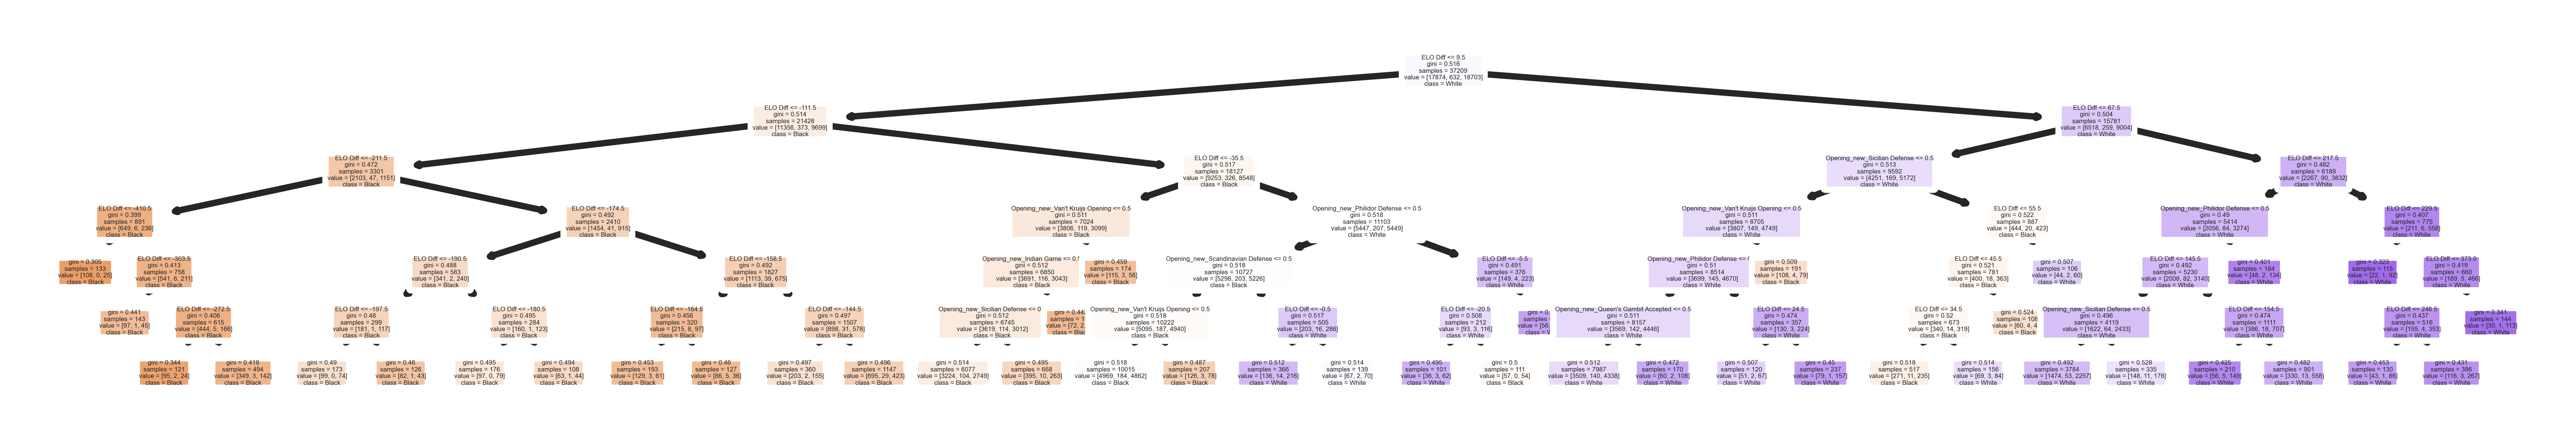

In [39]:

f = plt.figure(dpi=1200, figsize=(7,1),linewidth=.1)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])


![The Philidor Defence](lowphoto/low_left.png "Title")

![The Philidor Defence](lowphoto/low_right.png "Title")

With lower rated players, we see that lopsided openings, the Van't Kruijs, Philidor Defense, become much more popular, and they consistantly result in one side's victory, Black and White respectively. 

When Black stronger than white, van't kruijs, Indian Game and Sicilian are Good for Black, while Philidor and Scandinavian are Good for White.

When white is stronger than black, Sicilian and Van't Krujis are Good for Black, while Philidor is still Good for White.

When the disparity in ratings is too high(>about 100 points), the opening is not a good predictor for results as the stronger side is much more likely to win regardless.